# Importing libraries

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from numpy import linalg as LA
import seaborn as sns
import pandas as pd
import sys

# Loading data, initial plot

In [2]:
data = np.loadtxt("clu_data.txt")

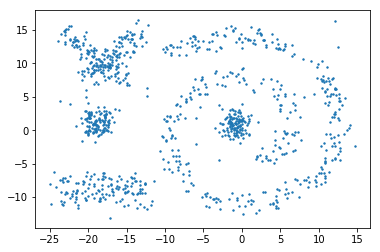

In [3]:
plt.scatter(data[:, 0], data[:, 1], s=2)

# K-means

In [30]:
def kmeans(data:np.ndarray, k, max_repet=100):
    x = data[:, 0]
    y = data[:, 1]
    n_points = len(x)
    max_x = np.max(x)
    min_x = np.min(x)
    max_y = np.max(y)
    min_y = np.min(y)
    distances = np.zeros((n_points, k))
    classes = np.zeros(n_points)
    indicator = np.zeros(n_points)
    best_centers = np.zeros((k, 2))
    SSE_min = sys.maxsize
    for cnt in range(max_repet):
        centers = np.stack([min_x + (max_x - min_x) * np.random.random_sample(k), 
                            min_y + (max_y - min_y) * np.random.random_sample(k)], axis=1)
        halt_flag = False
        while not halt_flag:
            halt_flag = True
            for j in range(k):
                distances[:, j] = ((data - centers[j])**2).sum(axis=1)
            classes = np.argmin(distances, axis=1)
            for j in range(k):
                indicator = (classes == j).astype(int)[:, None]
                if indicator.sum() == 0:
                    break
                center = (indicator * data).sum(axis=0) / indicator.sum()
                if (center != centers[j]).any():
                    halt_flag = False
                centers[j] = center
            else:
                continue
            break
        else:
            SSE = np.min(distances, axis=1).sum() / n_points
            if SSE < SSE_min:
                best_centers = centers.copy()
                SSE_min = SSE
                best_classes = classes
            continue
    return best_centers, SSE_min, best_classes

# SSE plot

In [31]:
max_k = 15
SSE = np.zeros(max_k)
for k in range(max_k):
    _, SSE[k], _ = kmeans(data, k + 1) # k starts from zero

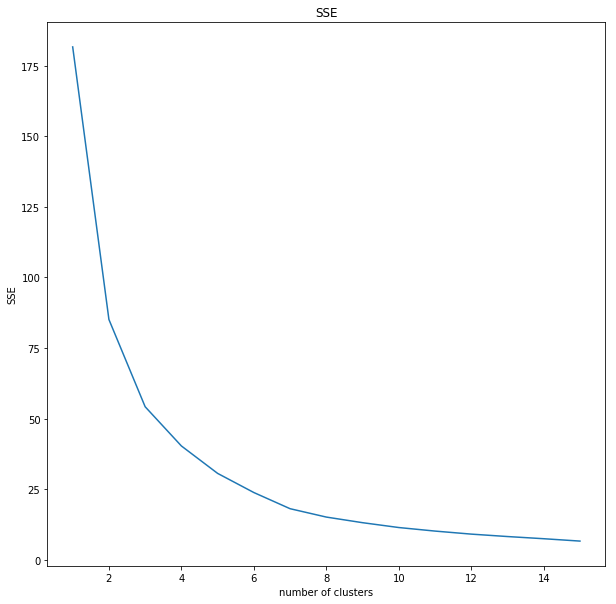

In [32]:
plt.figure(figsize=(10, 10))
plt.title("SSE")
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.plot(range(1, max_k + 1), SSE)
plt.savefig("SSE.png")

# Manually choosing best k

In [37]:
best_k = 4
_, _, classes = kmeans(data, best_k, max_repet=10000)
classes = classes[:, None]

In [38]:
df = pd.DataFrame(data, columns={'x', 'y'})
df['class'] = classes

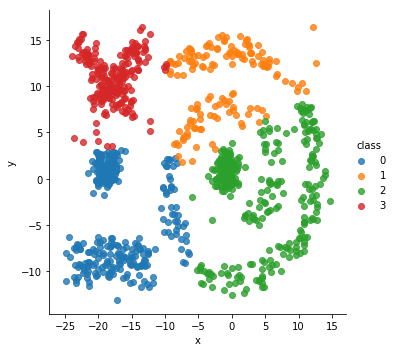

In [39]:
facet = sns.lmplot(data=df, x='x', y='y', hue='class', 
                   fit_reg=False, legend=True, legend_out=True)
facet.savefig("k-means.png")